In [1]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('C:/Users/User/Documents/GitHub/1_python_public/HW-practice/data/pokemon.csv')
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [31]:
df.tail()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [4]:
# Узнаем общее количество существующих покемонов, а также количество признаков, по которым они классифицированы
df.shape

(800, 11)

In [8]:
# Выведем общее описание датасета, чтобы сделать выводы о самых сильных, минимальных, средних и медианных показателях
df.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [9]:
# Выведем нечисловые данные в датасете, чтобы анализ был полным, а заодно посмотрим, сколько покемонов являются легендарными: 65 (показатель freq)
df.describe(include=['object', 'bool'])

,Name,Type 1,Type 2,Legendary
count,799,800,414,800
unique,799,18,18,2
top,Gourgeist Large Size,Water,Flying,False
freq,1,112,97,735


In [21]:
# Убедимся на всякий случай, что легендарных покемонов действительно 65
df[df['Legendary']==True].groupby(['Name'])['Legendary'].value_counts()

Name                Legendary
Arceus              True         1
Articuno            True         1
Azelf               True         1
Cobalion            True         1
Darkrai             True         1
                                ..
Xerneas             True         1
Yveltal             True         1
Zapdos              True         1
Zekrom              True         1
Zygarde Half Forme  True         1
Name: Legendary, Length: 65, dtype: int64

In [22]:
# Посчитаем количество легендарных покемонов, обладающих вторым типом атаки
df[df['Legendary']==True].groupby(['Type 2'])['Legendary'].value_counts()

Type 2    Legendary
Dark      True          1
Dragon    True          4
Electric  True          1
Fairy     True          2
Fighting  True          4
Fire      True          3
Flying    True         13
Ghost     True          1
Ground    True          1
Ice       True          3
Psychic   True          5
Steel     True          1
Water     True          1
Name: Legendary, dtype: int64

У большинства (75%) покемонов:
- показатель здоровья не ниже 80;
- показатель атаки не ниже 100;
- показатель защиты не ниже 90;
- показатель скорости атаки не ниже 95;
- показатель скорости защиты не ниже 90;
- показатель скорости не ниже 90%.
--------------------------------------------
- Каждый покемон обладает уникальным именем;
- Имя одного покемона отсутствует в датасете;
- Всего существует 18 типов атак первого типа;
- Всего существует 18 типов атак второго типа;
- Тем или иным видом атаки первого типа обладают все покемоны;
- Тем или иным видом атаки второго типа обладает 414 покемонов, 51,75% от общего числа покемонов; 
- Легендарных покемонов всего 65, 8,1 % от общего числа покемонов;
- Вторым типом атаки обладает 13 легендарных покемонов;
- Самый часто встречающийся среди легендарных покемонов вид второго типа атаки - летающий.

In [3]:
# Нарисуем сводную таблицу, чтобы выявить наиболее типичные показатели для легендарных покемонов
def get_pivot(column):
    pivot=df.pivot_table(index=column, columns='Legendary', values='Name', aggfunc='count')
    pivot=pivot.fillna(0) # Уберем пропуски в данных, заменив их на 0, чтобы исключить ошибки в подсчете и выводе топовых покемонов
    pivot['Legendary_count'] = pivot[False]+pivot[True]
    pivot['ratio']=round(pivot[True]/pivot['Legendary_count'],4)*100  # округлим процентные показатели до двух знаков после запятой
    pivot.columns = ['Normal', 'Legendary', 'Legendary_count', 'ratio'] # переименуем колонки True и False в "Normal" и "Legendary"
    pivot=pivot.reset_index() # сбросим сортировку по индексам
    pivot=pivot.sort_values(by='ratio', ascending=False) # отсортируем по процентам по убыванию
    return pivot.head(5) # выведем первые пять покемонов по каждому показателю

In [6]:
for indicator in ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    print('Показатель '+indicator)
    print(get_pivot(indicator))
    print('---------------')
    print()

Показатель HP
     HP  Normal  Legendary  Legendary_count   ratio
71  106     0.0        5.0              5.0  100.00
82  126     0.0        2.0              2.0  100.00
81  125     1.0        3.0              4.0   75.00
59   89     1.0        2.0              3.0   66.67
61   91     3.0        4.0              7.0   57.14
---------------

Показатель Attack
     Attack  Normal  Legendary  Legendary_count  ratio
110     190     0.0        1.0              1.0  100.0
92      129     0.0        1.0              1.0  100.0
108     180     0.0        3.0              3.0  100.0
94      131     0.0        2.0              2.0  100.0
104     160     2.0        3.0              5.0   60.0
---------------

Показатель Defense
     Defense  Normal  Legendary  Legendary_count   ratio
72       106     0.0        1.0              1.0  100.00
84       121     0.0        1.0              1.0  100.00
89       129     0.0        1.0              1.0  100.00
97       160     1.0        2.0              

Опишем показатели потенциально нового легендарного покемона, основываясь на 100% 
- Показатель здоровья у легендарных покемонов должен быть не ниже около 126;
- Показатель атаки - от 129 до 190;
- Показатель защиты - от 106 до 125;
- Скорость атаки должна быть не ниже 154 и не выше 194;
- Скорость защиты - от 111 до 180; 
- Показатель скорости должен быть не ниже 111 и не выше 180.

Таким образом, теперь можно ориентироваться на эти данные при создании нового легендарного покемона. 

In [11]:
df.isnull().sum() # проверим количество пропусков в данных и выявим, в каких именно столбцах они находятся

Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

По этим данным видно, что пропуски есть только в текстовых данных, так что заменять средним пропуски в числовых данных не нужно.

In [12]:
# на всякий случай убедимся еще раз, что пропусков в числовых данных нет, и заменим пропуски в текстовых данных на missing в выявленных выше столбцах
df['Name'] = df['Name'].fillna('missing')
df['Type 2'] = df['Type 2'].fillna('missing')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      800 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [16]:
# Посчитаем минимальные, максимальные, средние и медианные значения по скорости для покемонов с 1 типом атаки
df.groupby('Type 1')['Speed'].agg(['mean', 'min', 'max', 'median'])

,mean,min,max,median
Type 1,,,,
Bug,61.681159,5,160,60.0
Dark,76.161290,20,125,70.0
Dragon,83.031250,40,120,90.0
Electric,84.500000,35,140,88.0
Fairy,48.588235,15,99,45.0
Fighting,66.074074,25,118,60.0
Fire,74.442308,20,126,78.5
Flying,102.500000,55,123,116.0
Ghost,64.343750,20,130,60.5


In [33]:
# Посчитаем средний показатель скорости среди средних
df.groupby('Type 1')['Speed'].agg(['mean']).mean()

mean    69.131196
dtype: float64

In [35]:
# Посчитаем медианный показатель скорости среди медианных
df.groupby('Type 1')['Speed'].agg(['median']).median()

median    63.75
dtype: float64

Скорость у покемонов с тем или иным видом атаки первого типа:
- Минимальная - 5;
- Средняя - 69;
- Медианная - 63,75;
- Максимальная - 180. 

In [17]:
# Посчитаем минимальные, максимальные, средние и медианные значения по скорости для покемонов со 2 типом атаки
df.groupby('Type 2')['Speed'].agg(['mean', 'min', 'max', 'median'])

,mean,min,max,median
Type 2,,,,
Bug,61.666667,45,75,65.0
Dark,75.350000,35,122,74.0
Dragon,80.555556,38,145,87.5
Electric,71.500000,32,108,67.0
Fairy,61.217391,15,116,50.0
Fighting,87.384615,48,135,83.0
Fire,79.666667,20,115,88.0
Flying,85.721649,40,160,85.0
Ghost,53.857143,20,110,52.5


In [36]:
# Посчитаем средний показатель скорости среди средних
df.groupby('Type 2')['Speed'].agg(['mean']).mean()

mean    67.857116
dtype: float64

In [38]:
# Посчитаем медианный показатель скорости среди медианных
df.groupby('Type 2')['Speed'].agg(['median']).median()

median    66.0
dtype: float64

Скорость у покемонов с тем или иным видом атаки второго типа:
- Минимальная - 5;
- Средняя - 67,8;
- Медианная - 66;
- Максимальная - 180. 

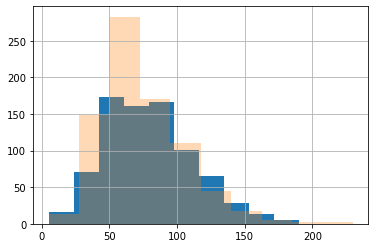

In [18]:
# Изобразим на одном графике гистограммы по колонкам Attack и Defense.
x = df['Attack'].hist()
y = df['Defense'].hist(alpha = 0.3)

За редким исключением показатель атаки выше показателя защиты. Опять же за редким исключением данные показатели почти совпадают.

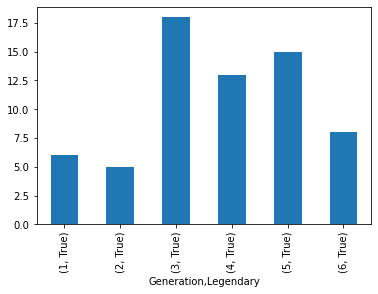

In [39]:
df[df['Legendary']==True].groupby(['Generation'])['Legendary'].value_counts().plot.bar();

В 3 поколении больше всего легендарных покемонов. 